# Random Walk Markov Chain Example

This is an example problem illustrating the basics of a random walk Markov chain.

In [2]:
# Standard imports
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns

from tqdm.notebook import tqdm

# needed for our loss plots
from IPython.display import clear_output

# using inline, have to set the figure bigger
%matplotlib inline

# set figure parameters so they look pretty
import matplotlib.pylab as pylab

# Use the Gill Sans font
import matplotlib.font_manager as fm
font = fm.FontProperties(
       family = 'Gill Sans',
       fname = '/usr/share/fonts/truetype/adf/GilliusADF-Regular.otf')
params = {'legend.fontsize': 14,
          'figure.figsize': (9.5, 6),
         'axes.labelsize': 14,
         'axes.titlesize': 16,
         'xtick.labelsize': 14,
         'ytick.labelsize': 14,
         'axes.spines.right' : False,
         'axes.spines.left' : False,
         'axes.spines.top' : False,
         'axes.spines.bottom' : False,
         'font.family' : 'Gill Sans'}
pylab.rcParams.update(params)

# I like to have more colors than what are available, so define tableau20 colors:
tableau20={
    'deep_blue' : (31, 119, 180), 'light_blue' : (174, 199, 232),
    'deep_orange' :  (255, 127, 14), 'light_orange' : (255, 187, 120), 
    'deep_green' :(44, 160, 44), 'light_green' : (152, 223, 138),
    'deep_red' : (214, 39, 40), 'light_red' : (255, 152, 150), 
    'deep_violet' : (148, 103, 189), 'light_violet' : (197, 176, 213), 
    'deep_brown' : (140, 86, 75), 'light_brown': (196, 156, 148), 
    'deep_pink' : (227, 119, 194), 'light_pink' : (247, 182, 210), 
    'deep_gray' : (127, 127, 127), 'light_gray' : (199, 199, 199), 
    'deep_olive' : (188, 189, 34), 'light_olive' : (219, 219, 141), 
    'deep_cyan' : (23, 190, 207), 'light_cyan' : (158, 218, 229)
}

for key in tableau20.keys():    
    r, g, b = tableau20[key]    
    tableau20[key] = (r / 255., g / 255., b / 255.)

*****
# Framing the Problem

Here we set up the problem described in the [blog post](https://swebb.io), specifically that of a drunk person trying to walk down the street, and what is the probability that, starting on the left side of the street, they finish on the left side in front of their apartment building. We say that they want to be in the left sidewalk, so the probability that if they stay on the left sidewalk at the next step is 80%, and 20% that they end up in the street. Once they get in the street, they want to get on a sidewalk but get indecisive, so it's equal probability that they stay in the street versus pick either sidewalk. If they end up in the right sidewalk, they really want to get back to the left sidewalk, so there's an 80% chance they go back into the street and a 20% chance they stick around in that sidewalk.

In this case, the transition matrix is:

$$T = \left ( \begin{array}{ccc} 4/5 & 1/3 & 0 \\ 1/5 & 1/3 & 4/5 \\ 0 & 1/3  & 1/5 \end{array} \right )$$

In [58]:
T_matrix = np.mat([[0.8, 0.2, 0.],
                   [1./3, 1./3, 1./3],
                   [0., 0.8, 0.2]]).transpose()
T_matrix.view()

matrix([[0.8       , 0.33333333, 0.        ],
        [0.2       , 0.33333333, 0.8       ],
        [0.        , 0.33333333, 0.2       ]])

*****
# Equilibrium Distribution

Here we compute the equilibrium distribution. We know from the properties of transition matrices that the equilibrium probability distribution is the properly normalized left eigenvector $\vec{\pi} = \vec{v} \big / \sum_i v_i$ corresponding to the eigenvalue $1$.

In [59]:
# import the eigensystem library
from numpy.linalg import eig

eigs, vecs = eig(T_matrix)

for idx, eigval in enumerate(eigs):
    print('for eigenvalue {}'.format(eigval))
    print('eigenvector: {}'.format(vecs.transpose()[idx]))

for eigenvalue 1.0000000000000002
eigenvector: [[-0.83844362 -0.50306617 -0.2096109 ]]
for eigenvalue 0.6151208015691236
eigenvector: [[ 0.81487644 -0.45196111 -0.36291533]]
for eigenvalue -0.2817874682357903
eigenvector: [[ 0.24563257 -0.7971667   0.55153413]]


The first eigenvalue is the maximum eigenvalue, so we can compute the normalized $\vec{\pi}$ by renormalizing that eigenvector:

In [60]:
pi_vec = (vecs.transpose()[0]/np.sum(vecs.transpose()[0])).reshape(1,3)

print('equilibrium distribution: \n {}'.format(pi_vec.transpose()))

equilibrium distribution: 
 [[0.54054054]
 [0.32432432]
 [0.13513514]]


From this we can conclude that, for a sufficiently long walk, there is about a 38.5% chance you finish on the correct side of the street.

*****
# The Long Walk

This equilibrium distribution is the outcome of a long walk, but it can take a while to reach that equilibrium from an initial condition, depending on the size of the next-largest eigenvalue. Here we do a numerical experiment, applying $T$ repeatedly to the probability to watch it converge to equilibrium.

In [63]:
n_steps = 10

prob_vec = np.array([[1., 0, 0]]).transpose()
prob_hist = [prob_vec]

for step in range(n_steps):
    prob_vec = np.matmul(T_matrix, prob_vec)
    prob_hist.append(prob_vec)
    
prob_hist = np.array(prob_hist).transpose().reshape(3,n_steps+1)
print(np.shape(prob_hist))

(3, 11)


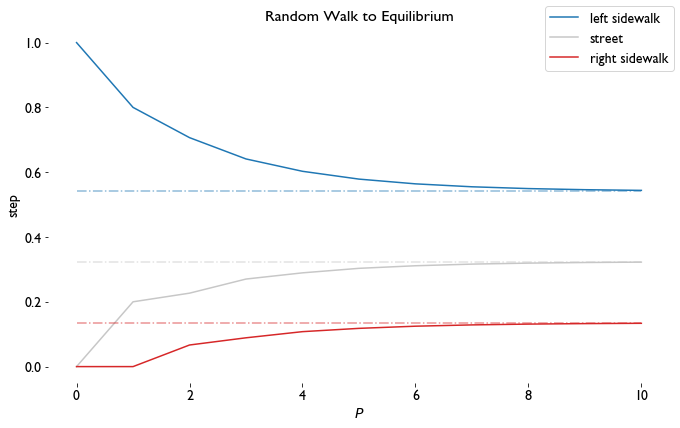

In [64]:
labels = ['left sidewalk', 'street', 'right sidewalk']
colors = ['deep_blue', 'light_gray', 'deep_red']
fig, ax = plt.subplots()
for idx in range(3):
    ax.plot(prob_hist[idx], label=labels[idx], color=tableau20[colors[idx]])
    ax.plot(np.ones(n_steps+1)*pi_vec[0,idx], color=tableau20[colors[idx]], linestyle='dashdot', alpha=0.5)
    
ax.set_xlabel(r'$P$')
ax.set_ylabel(r'step')
ax.set_title('Random Walk to Equilibrium')
fig.legend()
fig.tight_layout()
fig.savefig('../figs/random_walk.png')

pass;